### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [5]:
# Lets have an overview of the data per fields
objectColumns = data.columns
s='- '
for col in objectColumns:
    NbNa = data[col].isnull().sum()
    values = data[col].value_counts().sort_index()
    if objectColumns.get_loc(col) != 0: s+='- '
    s += col + ' : { na:'+str(NbNa)
    #if data[col].dtypes == 'object': 
    for index, value in values.items():
        s+=f", '{index}': {value}"
    s += ' }\n'
#s+=''
print(s)

- destination : { na:0, 'Home': 3237, 'No Urgent Place': 6283, 'Work': 3164 }
- passanger : { na:0, 'Alone': 7305, 'Friend(s)': 3298, 'Kid(s)': 1006, 'Partner': 1075 }
- weather : { na:0, 'Rainy': 1210, 'Snowy': 1405, 'Sunny': 10069 }
- temperature : { na:0, '30': 2316, '55': 3840, '80': 6528 }
- time : { na:0, '10AM': 2275, '10PM': 2006, '2PM': 2009, '6PM': 3230, '7AM': 3164 }
- coupon : { na:0, 'Bar': 2017, 'Carry out & Take away': 2393, 'Coffee House': 3996, 'Restaurant(20-50)': 1492, 'Restaurant(<20)': 2786 }
- expiration : { na:0, '1d': 7091, '2h': 5593 }
- gender : { na:0, 'Female': 6511, 'Male': 6173 }
- age : { na:0, '21': 2653, '26': 2559, '31': 2039, '36': 1319, '41': 1093, '46': 686, '50plus': 1788, 'below21': 547 }
- maritalStatus : { na:0, 'Divorced': 516, 'Married partner': 5100, 'Single': 4752, 'Unmarried partner': 2186, 'Widowed': 130 }
- has_children : { na:0, '0': 7431, '1': 5253 }
- education : { na:0, 'Associates degree': 1153, 'Bachelors degree': 4335, 'Graduate de

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Drop car column as it contains data for less then 1% of record
df = data.drop(columns='car') 

# Drop toCoupon_GEQ5min as the value is always 1
df = df.drop(columns='toCoupon_GEQ5min')  
df = df.dropna()

# by removing incomplete survey we retain 95% of the full dataset which should not be an issue. 
df.shape[0]/data.shape[0]

0.9523021128981394

In [7]:
# Set numerical values to allow sorting and correlation when relevant
## Set mapping for consommation habit datasets using mean value of each group greater than 8 is set to 10
habitMap = { 'never': 0
           , 'less1': .5
           , '1~3': 2
           , '4~8': 6
           , 'gt8': 10 }

df['Bar_'] = df['Bar'].map(habitMap)
df['CoffeeHouse_'] = df['CoffeeHouse'].map(habitMap)
df['CarryAway_'] = df['CarryAway'].map(habitMap)
df['RestaurantLessThan20_'] = df['RestaurantLessThan20'].map(habitMap)
df['Restaurant20To50_'] = df['Restaurant20To50'].map(habitMap)

## set mapping for time based on 24 hour format
df['time_'] = df['time'].map({ '10AM': 10, '10PM': 22, '2PM': 14, '6PM': 18, '7AM': 7 })

## set mapping for income based on the lower boundary
df['income_'] = df['income'].map({ '$100000 or More': 100_000, '$12500 - $24999': 12_500, '$25000 - $37499': 25_000, '$37500 - $49999': 37_500, '$50000 - $62499': 50_000, '$62500 - $74999': 62_500, '$75000 - $87499': 75_000, '$87500 - $99999': 87_500, 'Less than $12500': 0 })

## set mapping for age based on the lower boundary (minimum driver age = 16)
df['age_'] = df['age'].map({'21': 21, '26': 26, '31': 31, '36': 36, '41': 41, '46': 46, '50plus': 51, 'below21': 16})

## Add text column for acceptance
df['Acceptance'] = df['Y'].map({0:'No', 1:'Yes'})

# Rename column 'passenger' to 'passenger' fixing a spelling issue
df = df.rename(columns={'passanger':'passenger'})

4. What proportion of the total observations chose to accept the coupon? 



In [8]:
print('Proportion of the total observations to accept the coupon : %f' % df['Y'].mean())

Proportion of the total observations to accept the coupon : 0.569335


5. Use a bar plot to visualize the `coupon` column.

In [9]:
import plotly.express as px

fig = px.bar( df.groupby(by=['coupon','Acceptance']).size().reset_index()
            , x='coupon', y=0, color='Acceptance'
            , width=800, height=600
            , labels={'0':'Count','coupon':'Coupon Type'})
fig.update_layout(title='Count per coupon type')
fig.show()

 * The most popular coupon type are the coffee house coupons. However, the Bar and coupon for restaurant between $20 and $50 are more likely to be accepted.
 * Carry out and take away coupons and Restaurant coupons under $20 are the least likely to be accepted.

6. Use a histogram to visualize the temperature column.

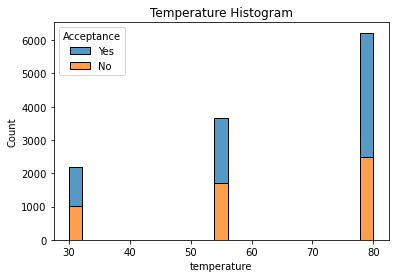

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df, x='temperature', hue='Acceptance', multiple='stack')
plt.title('Temperature Histogram')
plt.show()

 * Drivers are more likely to accept the coupon as the temperature raise.

*Note: the granularity of the temperature is limited for better analysis*

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
dfbar = df.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [12]:
print('Proportion of accepted bar coupon : %f' % dfbar['Y'].mean())

Proportion of accepted bar coupon : 0.411918


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
# prevent arning message
pd.options.mode.chained_assignment = None  
# use Bar_ set with habitMap 
dfbar['barFreq_lte3']=dfbar['Bar_'] <= 3
fig = px.histogram( dfbar
            , x='barFreq_lte3', y='Y'
            , histfunc='avg'
            , width=800, height=400
            , range_y= [0,1]
            )
fig.update_layout(title='Acceptance proportion per Bar visit frequency per month')
fig.update_xaxes(tickmode='array', categoryorder='array', categoryarray=[True,False], tickvals=[True,False], ticktext=['3 or less','4 or more'], title='Bar frequency')
fig.update_yaxes(title='Acceptance proportion')
fig.show()


 * Driver who are going to bar more than 3 times a month are more likely to accept the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [14]:
dfbar['Age_gt25_barFreq_gt1']=((dfbar['Bar_']>1) & (~dfbar['age'].isin(["below21","21"])))
fig = px.histogram( dfbar
            , x='Age_gt25_barFreq_gt1', y='Y'
            , histfunc='avg'
            , width=800, height=400
            , range_y= [0,1]
            )
fig.update_layout(title='Acceptance proportion for driver over 25yo visiting Bar more than once a month')
fig.update_xaxes(tickmode='array', categoryorder='array', categoryarray=[True,False], tickvals=[True,False], ticktext=['Over 25yo with bar frequency > 1','Others'], title='Bar frequency')
fig.update_yaxes(title='Acceptance proportion')
fig.show()

 * Drivers who are over 25 and go to bar more than once a month are more likely to accept the coupon than others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [15]:
dfbar['NoFarmingNokidBarFreqgt1']=((dfbar['Bar_']>1) & (~dfbar['passenger'].isin(["Alone","Kid(s)"])) & (dfbar['occupation']!= 'Farming Fishing & Forestry'))
fig = px.histogram( dfbar
            , x='NoFarmingNokidBarFreqgt1', y='Y'
            , histfunc='avg'
            , width=800, height=400
            , range_y= [0,1]
            )
fig.update_layout(title='Acceptance proportion for driver not in Farming Fishing & Forestry<br>going to Bar more than once a month with adult passenger<br>')
fig.update_xaxes(tickmode='array', categoryorder='array', categoryarray=[True,False], tickvals=[True,False], ticktext=['Not in Farming Fishing & Forestry<br>Bar frequency >1 with adult passenger','Others'], title='Bar frequency')
fig.update_yaxes(title='Acceptance proportion')
fig.show()

 * Drivers not in farming, fishing, or forestry and go to bar more than once a month are more likely to accept the coupon than others.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [16]:
# Prepare data for visualisation
# add boolean column to identify if the driver that go to bars more than once a month, had passengers that were not a kid, and were not widowed
dfbar['NotwidowedNokidBarFreqgt1']=((dfbar['Bar_']>1) & (~dfbar['passenger'].isin(["Alone","Kid(s)"])) & (dfbar['maritalStatus']!= 'widowed'))
# add boolean column to identify if the driver that go to bars more than once a month and are under 30 years old
dfbar['under30BarFreqgt1']=((dfbar['Bar_']>1) & (dfbar['age'].isin(['Below21','21','26'])))
# add boolean column to identify if the driver that go to cheap restaurants more than 4 times a month and income is less than 50K
dfbar['CheaprestaurantFreqgt4Under50K']=((dfbar['income_']<50000) & (dfbar['RestaurantLessThan20_']>4))


In [17]:
#Visualisation
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def DrawResultsBarCharts(categories,data):
    Results = pd.DataFrame()
    for i,row in categories.iterrows():
        Results = pd.concat([Results, data.pivot_table(values='Y', index=row.Field, aggfunc={'mean','sum','count'}).assign(Name=row.Field,Descr=row.Descr)])

    Results=Results.rename(columns={'count':'Total', 'mean':'Acceptance', 'sum':'Accepted'})
    Results['Acceptance Ratio']=Results['Accepted']/Results['Total']
    Results['Not Accepted']=Results['Total']-Results['Accepted']
    Results=Results.sort_values(by=['Descr'], ascending=True).sort_index(ascending=False)

    fig = make_subplots(rows=2, cols=1, subplot_titles =['Count','Acceptance Ratio'])

    fig.add_bar(x=[Results['Descr'],Results.index], name='Accepted'        , y=Results['Accepted'], row=1, col=1)
    fig.add_bar(x=[Results['Descr'],Results.index], name='Not Accepted'        , y=Results['Not Accepted'], row=1, col=1)
    fig.add_bar(x=[Results['Descr'],Results.index], name='Acceptance Ratio'        , y=Results['Acceptance Ratio'], row=2, col=1)

    fig.update_layout(
        title='Group acceptance comparison',
        width = 1200, height=700,
        yaxis={
            'title':"Number",
            },
        yaxis2={
            'title':"Proportion",
            'range':[0,1],
            'anchor':"x",    
        },
        barmode='stack',
        legend_title="Legend"
    )
    fig.update_xaxes(tickangle=45)
    #change order of legend
    fig.update_layout(legend_traceorder="normal")


    fig.show()

groups = pd.DataFrame(columns=['Field','Descr']
                 , data=[['NotwidowedNokidBarFreqgt1','Not widowed<br>Bar frequency >1 with adult passenger']
                        ,['under30BarFreqgt1','Under 30yo with Bar frequency >1']
                        ,['CheaprestaurantFreqgt4Under50K','Income < 50K with cheap restaurant frequency >4']])

DrawResultsBarCharts(groups,dfbar)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

 * Group of Drivers under 30 and go to bar more than once a month and the group of drivers who are not widowed and go to bar more than once a month having adults as passengers are more likely to accept the coupon than the last group.
 * Drivers under 30 and go to bar more than once a month are more numerous therefore are a better target for bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

 * Identify a coupon group to study.

In [29]:
# get acceptance rate per coupon
df.groupby(['coupon']).agg({'Y':['mean','count']}).reset_index()

coupon         Y      
                              mean count
0                    Bar  0.411918  1913
1  Carry out & Take away  0.737719  2280
2           Coffee House  0.496331  3816
3      Restaurant(20-50)  0.446013  1417
4        Restaurant(<20)  0.709009  2653

In [30]:
#draw histogram of coupon distribution is df
px.histogram(df.sort_values(['Acceptance'],ascending=False), x='coupon', width=800, height=400,color='Acceptance',title='Coupon distribution')


 * Coffee House coupon are the most common coupons but have low acceptance rate.
 * "Carry out & Take away" and "Restaurant (<20$)" have the highest acceptance rate. 

Has Coffe House has the most progress margin let's focus on this category.
 * Create subset of data for Coffee House.

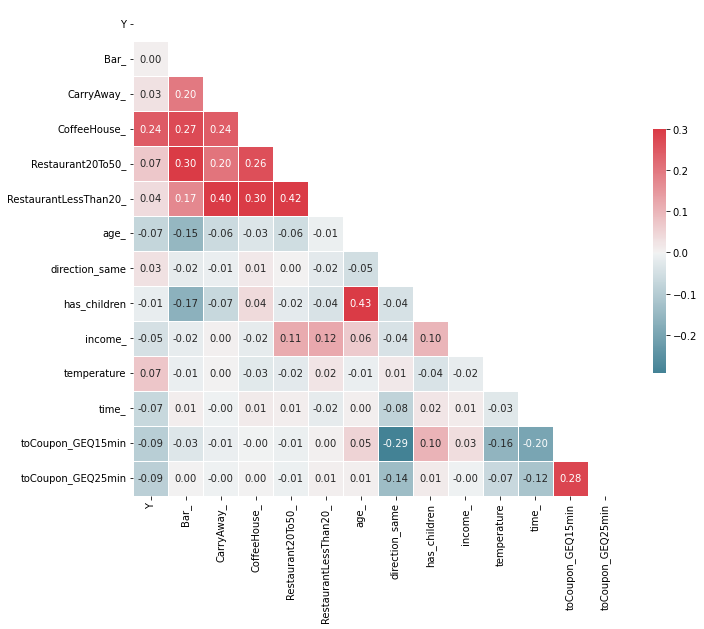

In [19]:
#filter df where coupon is Coffee House
dfcoffee = df[df['coupon']=='Coffee House']
# Compute the correlation matrix
corr = dfcoffee[['Y', 'Bar_', 'CarryAway_',
       'CoffeeHouse_', 'Restaurant20To50_', 'RestaurantLessThan20_', 'age_',
       'coupon', 'destination', 'direction_same', 'education',
       'expiration', 'gender', 'has_children', 'income_',
       'temperature', 'time_', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'weather']].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10}, fmt='.2f')

plt.show()

 * We can see a clear corellation between the number of times the driver goes to a coffee house and the acceptance rate of the coupon.

In [20]:
#Create histogram of CoffeHouse within dfcoffee
fig = px.histogram(dfcoffee.sort_values(['Acceptance'],ascending=False), x='CoffeeHouse', width=800, height=400,color='Acceptance')
#Change order of x-axis 
fig.update_xaxes(categoryorder='array', categoryarray=['never','less1','1~3','4~8','gt8'])
fig.update_layout(barmode='stack',bargap=0.15)
fig.show()

 * Let's look at each qualitative fields distribution and the associated average risk classification.

In [21]:
from math import ceil
colList = [col for col in dfcoffee.columns if dfcoffee[col].dtype == 'object' and col not in ['Acceptance','coupon'] and col+'_' not in dfcoffee.columns]
nbRows = 3
nbCols = 3
fig = make_subplots(rows=nbRows, cols=nbCols, subplot_titles =colList)
for i,col in enumerate(colList):
    r=ceil((i+1)/nbCols)
    c=((i)%nbCols)+1
    fig.add_trace(row=r, col=c, trace=go.Histogram(histfunc="sum", histnorm='percent', name='Distribution in % ' 
                                                  ,x=df[col], marker_color='blue', opacity=0.75, legendgroup='Distribution in % ' ,showlegend=(i==1)))
    fig.add_trace(row=r, col=c, trace=go.Histogram(histfunc="avg", y=100*df['Y'], name='% of accepted coupons' 
                                                  ,x=df[col], marker_color='orange', opacity=0.75, legendgroup='% of accepted coupons' ,showlegend=(i==1)))
    
    if(c==1):
        fig.layout['yaxis'+(str(i+1) if i>0 else "") ].title='%'
    fig.layout['yaxis'+(str(i+1) if i>0 else "") ].range=[0,100]
    if(r==nbRows):
        fig.layout['xaxis'+(str(i+1) if i>0 else "")].tickangle=-90
    

fig.update_layout(height=800, width=1000, title_text="Distribution to Accepted Coupons Comparison")
fig.layout.legend.title = 'Legend'
fig.layout.legend.x =  .72
fig.layout.legend.y = 0
fig.show()

Driver are more likeky to accept coupon (>60%) for Coffee House when:
    * not going to an urgent place
    * travelling with a friend
    * the weather is Sunny
    * the expiration date is 1 day
    * the driver is single
    * the driver has some high school education

 * create groups of drivers to compare. 

In [22]:
# add boolean field which is true for female driver who has academic degree has education
dfcoffee['Female_with_degree']=(dfcoffee['education'].isin(["Bachelors degree","Associates degree","Graduate degree (Masters or Doctorate)"])) & (dfcoffee['gender']=="Female")
# add boolean field which is true if the driver is over 25yo and has goes to coffee house more than 1 time per month
dfcoffee['Age_gt25_coffeeFreq_gt1']=((dfcoffee['CoffeeHouse_']>1) & (~dfcoffee['age_'].isin(["below21","21"])))
# add boolean field which is true if the driver traveling alone and has income >= 50K
dfcoffee['Income_gt50K_alone']=(dfcoffee['income_'] > 50_000) & (dfcoffee['passenger']=='Alone')
# add boolean field which is true if the driver going to work in the morning 
dfcoffee['going_to_work_morning']=(dfcoffee['destination']=='Work') & (dfcoffee['time_']<12)

 * compare the acceptance rate between the groups.

In [23]:
groups = pd.DataFrame(columns=['Field','Descr']
                     ,data=[['Female_with_degree', 'Female with academic degree']
                           ,['Age_gt25_coffeeFreq_gt1', 'over 25yo with coffee frequency > 1']
                           ,['Income_gt50K_alone', 'Income < 50K alone']
                           ,['going_to_work_morning', 'Going to work in the morning']])

DrawResultsBarCharts(groups,dfcoffee)

  * Drivers who are over 25 and go to Cofee House more than once a month are more likely to accept the coupon than others.
  * Driver with income less than 50K who drives alone are less likely to accept the coupon than others.